In [2]:
%run COMPLEJO.ipynb
%run VECTOR_MATRIZ.ipynb
%run COMPLEJO.ipynb

In [3]:
import unittest
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook 


In [19]:
class Bloch:
    
    @staticmethod
    def angulo(vector):
        norma= vector.norma()
        vector = vector*norma
        x = vector[0,0].modulo()
        y = vector[1,0].modulo()
        angulo=Complejo.obtenerAngulo(x,y)
        return angulo
    @staticmethod
    def fase(vector):  
        norma= vector.norma()
        vector = vector*norma
        t1= Complejo.obtenerAngulo(vector[0,0].parteReal,vector[0,0].parteImaginaria)
        t2= Complejo.obtenerAngulo(vector[1,0].parteReal,vector[1,0].parteImaginaria)
        return t1-t2
    @staticmethod
    def longitudEstandar(grados):
        return grados%360
    @staticmethod
    def latitudEstandar(grados):
        return grados%180 -90
    @staticmethod
    def gradosARadianes(grados):
        return grados*math.pi/180
    
    @staticmethod
    def graficar(ciudades):
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1] 

        # Para pasar de coordenadas esféricas (phi, theta) a coordenadas cartesianas (x, y, z):

        x = np.cos(phi) * np.sin(theta)
        y = np.sin(phi) * np.sin(theta)
        
        z = np.cos(theta)
        for i in ciudades:
            
            theta1 = Bloch.latitudEstandar(i[1])
            phi1 = Bloch.longitudEstandar(i[2])
            if(i[0] == "Londres"):
                print(phi1, theta1)
            theta1 = Bloch.gradosARadianes(theta1)
            phi1 = Bloch.gradosARadianes(phi1)
            
            x2 = np.cos(phi1) * np.sin(theta1)
            y2 = np.sin(phi1) * np.sin(theta1)

            z2 = np.cos(theta1)
            # Para graficar la esfera (estructura de alambre):

            ax.plot_wireframe(x, y, z, color='yellow', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)

            # Para graficar un punto cualquiera en el espacio 3d, en este caso (2, -2, 1):

            ax.scatter(x2, y2, z2, color='red', s=10) # El valor de s modifica el grosor del punto

            
            # Para hacer una etiqueta, en este caso sobre el punto (2, -2, 1):

            ax.text(x2, y2, z2, i[0], color='black')

            # Para graficar una flecha, en este caso del origen al punto (2, -2, 1):

            ax.quiver(0, 0, 0, x2, y2, z2, color='blue')

            # Nombres de los ejes

        ax.set_xlabel('Eje X')
        ax.set_ylabel('Eje Y')
        ax.set_zlabel('Eje Z')

    @staticmethod
    def graficarKets(kets):
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1] 

        # Para pasar de coordenadas esféricas (phi, theta) a coordenadas cartesianas (x, y, z):

        x = np.cos(phi) * np.sin(theta)
        y = np.sin(phi) * np.sin(theta)
        
        z = np.cos(theta)
        for i in kets:
            
            theta1 = Bloch.latitudEstandar(Bloch.angulo(i[1])*180/math.pi)
            phi1 = Bloch.longitudEstandar(Bloch.fase(i[1])*180/math.pi)
            print(theta1, phi1)
            theta1 = Bloch.gradosARadianes(theta1)*2
            phi1 = Bloch.gradosARadianes(phi1)
            
            x2 = np.cos(phi1) * np.sin(theta1)
            y2 = np.sin(phi1) * np.sin(theta1)

            z2 = np.cos(theta1)
            # Para graficar la esfera (estructura de alambre):

            ax.plot_wireframe(x, y, z, color='black', rstride=2, cstride=2, linewidth=0.5, alpha=0.1)
            # Para graficar un punto cualquiera en el espacio 3d, en este caso (2, -2, 1):

            ax.scatter(x2, y2, z2, color='red', s=10) # El valor de s modifica el grosor del punto

            
            # Para hacer una etiqueta, en este caso sobre el punto (2, -2, 1):

            ax.text(x2, y2, z2, i[0], color='black')

            # Para graficar una flecha, en este caso del origen al punto (2, -2, 1):

            ax.quiver(0, 0, 0, x2, y2, z2, color='blue')

            # Nombres de los ejes

        ax.set_xlabel('Eje X')
        ax.set_ylabel('Eje Y')
        ax.set_zlabel('Eje Z')
    
    

In [5]:
raiz=math.sqrt(3/2)/2
a = Matriz(2,1, [[(raiz, raiz)], [(-1/4, math.sqrt(3)/4)]])
print(a)
print(Bloch.angulo(a))
print(Bloch.fase(a))

['0.61 +0.61i']
['-0.25 +0.43i']
0.5235987755982989
1.3089969389957474


<IPython.core.display.Javascript object>


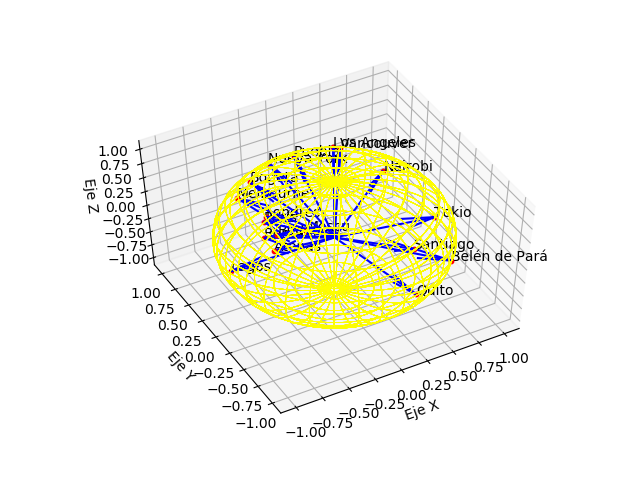

359.8833 -38.5


In [20]:


Ciudades = [
    ['Londres', 51.5, -0.1167],
    ['Bogotá', 4.5964, -74.0833],
    ['Roma', 41.8960, 12.4833],
    ['Melbourne', -37.8200, 144.9750],
    ['Nairobi', -1.2833, 36.8167],
    ['Santiago', -33.4500, -70.6670],
    ['Nueva York', 40.6943, -73.9249],
    ['Los Angeles', 34.1139, -118.4068],
    ['Moscú', 55.7522, 37.6155],
    ['Quito', -0.2150, -78.5001],
    ['Tokio', 35.6850, 139.7514],
    ['Lagos', 6.4433, 3.3915],
    ['Atenas', 37.9833, 23.7333],
    ['Belén de Pará', -1.4500, -48.4800],
    ['Budapest', 47.5000, 19.0833],
    ['Vancouver', 49.2734, -123.1216],
    ['París', 48.8667, 2.3333],
    ['Puebla', 19.0500, -98.2000]
]

Bloch.graficar(Ciudades)



<IPython.core.display.Javascript object>


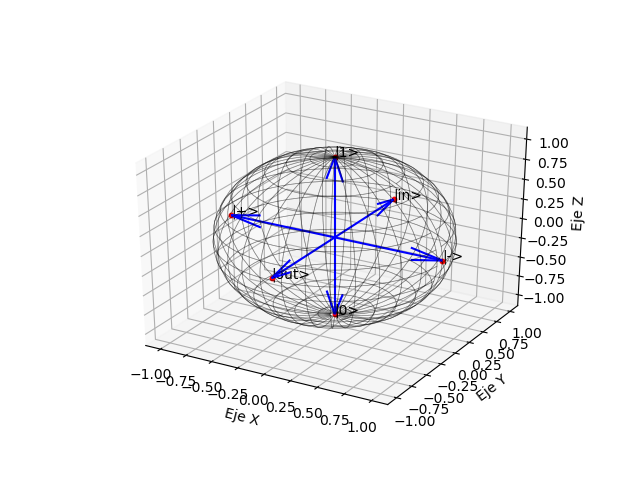

-90.0 0.0
0.0 0.0
-45.0 270.0
-45.0 90.0
-45.0 0.0
-45.0 180.0


In [21]:
kets = [
    ['|0>', Matriz(2,1, [[1], [0]])],
    ['|1>', Matriz(2,1, [[0], [1]])],
    ['|in>', Matriz(2,1, [[(1/2**0.5,0)], [(0, 1/2**0.5)]])],
    ['|out>', Matriz(2,1, [[(0,1/2**0.5)], [(1/2**0.5 ,0)]])],
    ['|+>', Matriz(2,1, [[(1/2**0.5,0)], [(1/2**0.5,0)]])],
    ['|->', Matriz(2,1, [[(1/2**0.5,0)], [(-1/2**0.5,0)]])]
]
Bloch.graficarKets(kets)